In [23]:
import nltk
from nltk import FreqDist
#nltk.download('stopwords') # run this one time

In [24]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
#df = pd.read_json('meta_AMAZON_FASHION.json', lines=True)
review = pd.read_json('AMAZON_FASHION.json', lines=True)

In [27]:
review.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is too small. I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen. Would not buy...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack to keep in work; someone (including myself) is always losing the back to an earring. I don't understand why all fish hook earrings don't have them. ...,My New 'Friends' !!,1408924800,NaN,NaN,NaN


In [28]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883636 entries, 0 to 883635
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         883636 non-null  int64  
 1   verified        883636 non-null  bool   
 2   reviewTime      883636 non-null  object 
 3   reviewerID      883636 non-null  object 
 4   asin            883636 non-null  object 
 5   reviewerName    883544 non-null  object 
 6   reviewText      882403 non-null  object 
 7   summary         883103 non-null  object 
 8   unixReviewTime  883636 non-null  int64  
 9   vote            79900 non-null   float64
 10  style           304569 non-null  object 
 11  image           28807 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 75.0+ MB


In [29]:
review = review.dropna(subset=["reviewText"])

In [30]:
review = review.dropna(subset=["summary"])

In [31]:
review.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is too small. I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen. Would not buy...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack to keep in work; someone (including myself) is always losing the back to an earring. I don't understand why all fish hook earrings don't have them. ...,My New 'Friends' !!,1408924800,NaN,NaN,NaN


### Data Preprocessing

In [32]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

D:\Tools\Anaconda\lib\site-packages\seaborn\categorical.py:332: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
D:\Tools\Anaconda\lib\site-packages\seaborn\utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


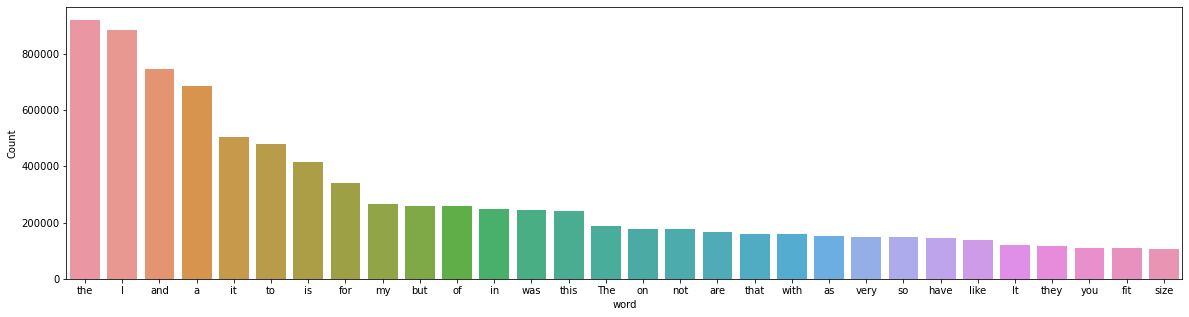

In [33]:
freq_words(review['reviewText'])

In [34]:
df = review['reviewText'].to_frame()
#df[['reviewText']]

In [35]:
#remove stop words as evidenced from previous diagram

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Arthur
[nltk_data]     Wen\AppData\Roaming\nltk_data...


True

In [37]:
stop = set(stopwords.words('english'))

In [38]:
df['noStopword'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

D:\Tools\Anaconda\lib\site-packages\seaborn\categorical.py:332: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
D:\Tools\Anaconda\lib\site-packages\seaborn\utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


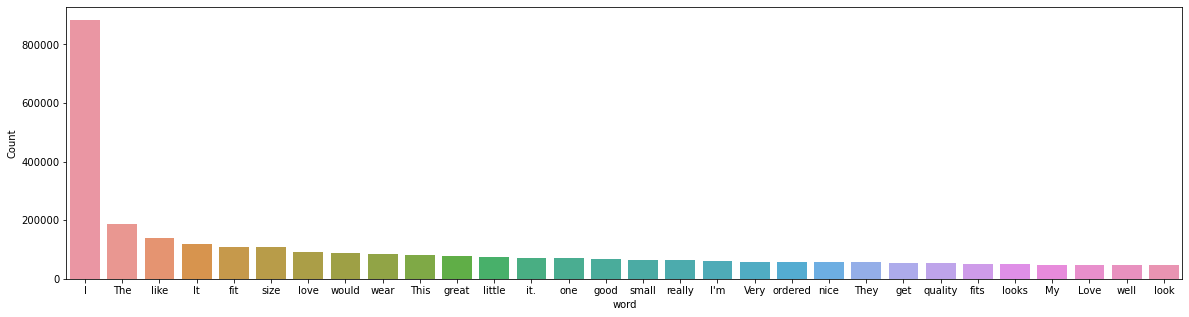

In [39]:
freq_words(df['noStopword'])

In [40]:
df['noStopword'] = df['noStopword'].str.replace("[^a-zA-Z#]", " ")
df['noStopword'] = df['noStopword'].str.lower()

<ipython-input-40-6a3f8751ceac>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['noStopword'] = df['noStopword'].str.replace("[^a-zA-Z#]", " ")


In [41]:
df['tokenized'] = df['noStopword'].apply(nltk.word_tokenize)

In [42]:
df['tagged'] = df['tokenized'].apply(nltk.pos_tag)

In [43]:
df['nouns'] = df['tagged'].apply(lambda x: [word for word, tag in x if tag in ['NN', 'NNS', 'NNP', 'NNPS']])

In [44]:
df['verbs'] = df['tagged'].apply(lambda x: [word for word, tag in x if tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']])

In [167]:
df['adjs'] = df['tagged'].apply(lambda x: [word for word, tag in x if tag.startswith("J")])

In [332]:
df['adverbs'] = df['tagged'].apply(lambda x: [word for word, tag in x if tag.startswith("RB")])

In [45]:
df.head()

,reviewText,noStopword,tokenized,tagged,nouns,verbs
0,Exactly what I needed.,exactly i needed,"[exactly, i, needed]","[(exactly, RB), (i, NN), (needed, VBD)]",[i],[needed]
1,"I agree with the other review, the opening is too small. I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen. Would not buy...",i agree review opening small i almost bent hook expensive earrings trying get higher end they re seen would buy price sending back,"[i, agree, review, opening, small, i, almost, bent, hook, expensive, earrings, trying, get, higher, end, they, re, seen, would, buy, price, sending, back]","[(i, JJ), (agree, VBP), (review, NN), (opening, VBG), (small, JJ), (i, NN), (almost, RB), (bent, JJ), (hook, NN), (expensive, JJ), (earrings, NNS), (trying, VBG), (get, VB), (higher, JJR), (end, N...","[review, i, hook, earrings, end, price]","[agree, opening, trying, get, re, seen, buy, sending]"
2,Love these... I am going to order another pack to keep in work; someone (including myself) is always losing the back to an earring. I don't understand why all fish hook earrings don't have them. ...,love these i going order another pack keep work someone including myself always losing back earring i understand fish hook earrings them just wish tiny bit longer,"[love, these, i, going, order, another, pack, keep, work, someone, including, myself, always, losing, back, earring, i, understand, fish, hook, earrings, them, just, wish, tiny, bit, longer]","[(love, IN), (these, DT), (i, NNS), (going, VBG), (order, NN), (another, DT), (pack, NN), (keep, NN), (work, NN), (someone, NN), (including, VBG), (myself, PRP), (always, RB), (losing, VBG), (back...","[i, order, pack, keep, work, someone, i, hook, bit]","[going, including, losing, earring, understand, earrings, wish]"
3,too tiny an opening,tiny opening,"[tiny, opening]","[(tiny, JJ), (opening, NN)]",[opening],[]
4,Okay,okay,[okay],"[(okay, NN)]",[okay],[]


In [46]:
df['Token_Count'] = df['tokenized'].str.len()

In [47]:
def norm_lemm_v_a_func(text):
    '''
    Lemmatize tokens from string
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use WordNetLemmatizer() with POS tag 'v' to lemmatize the created tokens
    Step 3: Use word_tokenize() to get tokens from generated string        
    Step 4: Use WordNetLemmatizer() with POS tag 'a' to lemmatize the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    '''
    words1 = word_tokenize(text)
    text1 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in words1])
    words2 = word_tokenize(text1)
    text2 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='a') for word in words2])
    return text2

def norm_lemm_v_a_func_token(text):
    '''
    Lemmatize tokens from string
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use WordNetLemmatizer() with POS tag 'v' to lemmatize the created tokens
    Step 3: Use word_tokenize() to get tokens from generated string        
    Step 4: Use WordNetLemmatizer() with POS tag 'a' to lemmatize the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    '''

    text1 = [WordNetLemmatizer().lemmatize(word, pos='v') for word in text]
    text2 = [WordNetLemmatizer().lemmatize(word, pos='a') for word in text1]
    return text2

In [48]:
df['lemmatized'] = df['noStopword'].apply(norm_lemm_v_a_func)

In [49]:
df.head()

,reviewText,noStopword,tokenized,tagged,nouns,verbs,Token_Count,lemmatized
0,Exactly what I needed.,exactly i needed,"[exactly, i, needed]","[(exactly, RB), (i, NN), (needed, VBD)]",[i],[needed],3,exactly i need
1,"I agree with the other review, the opening is too small. I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen. Would not buy...",i agree review opening small i almost bent hook expensive earrings trying get higher end they re seen would buy price sending back,"[i, agree, review, opening, small, i, almost, bent, hook, expensive, earrings, trying, get, higher, end, they, re, seen, would, buy, price, sending, back]","[(i, JJ), (agree, VBP), (review, NN), (opening, VBG), (small, JJ), (i, NN), (almost, RB), (bent, JJ), (hook, NN), (expensive, JJ), (earrings, NNS), (trying, VBG), (get, VB), (higher, JJR), (end, N...","[review, i, hook, earrings, end, price]","[agree, opening, trying, get, re, seen, buy, sending]",23,i agree review open small i almost bend hook expensive earrings try get high end they re see would buy price send back
2,Love these... I am going to order another pack to keep in work; someone (including myself) is always losing the back to an earring. I don't understand why all fish hook earrings don't have them. ...,love these i going order another pack keep work someone including myself always losing back earring i understand fish hook earrings them just wish tiny bit longer,"[love, these, i, going, order, another, pack, keep, work, someone, including, myself, always, losing, back, earring, i, understand, fish, hook, earrings, them, just, wish, tiny, bit, longer]","[(love, IN), (these, DT), (i, NNS), (going, VBG), (order, NN), (another, DT), (pack, NN), (keep, NN), (work, NN), (someone, NN), (including, VBG), (myself, PRP), (always, RB), (losing, VBG), (back...","[i, order, pack, keep, work, someone, i, hook, bit]","[going, including, losing, earring, understand, earrings, wish]",27,love these i go order another pack keep work someone include myself always lose back earring i understand fish hook earrings them just wish tiny bite long
3,too tiny an opening,tiny opening,"[tiny, opening]","[(tiny, JJ), (opening, NN)]",[opening],[],2,tiny open
4,Okay,okay,[okay],"[(okay, NN)]",[okay],[],1,okay


### EDA

In [50]:
def remove_single_char_func(text, threshold=1):
    '''
    Removes single characters from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes words whose length falls below the threshold (by default = 1)
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with removed words whose length was below the threshold (by default = 1)
    ''' 
    threshold = threshold
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

In [51]:
df['clean'] = df['lemmatized'].apply(remove_single_char_func)
df['clean'] = df.apply(lambda x: remove_single_char_func(x["lemmatized"], threshold=2), axis = 1)

In [52]:
df.head()

,reviewText,noStopword,tokenized,tagged,nouns,verbs,Token_Count,lemmatized,clean
0,Exactly what I needed.,exactly i needed,"[exactly, i, needed]","[(exactly, RB), (i, NN), (needed, VBD)]",[i],[needed],3,exactly i need,exactly need
1,"I agree with the other review, the opening is too small. I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen. Would not buy...",i agree review opening small i almost bent hook expensive earrings trying get higher end they re seen would buy price sending back,"[i, agree, review, opening, small, i, almost, bent, hook, expensive, earrings, trying, get, higher, end, they, re, seen, would, buy, price, sending, back]","[(i, JJ), (agree, VBP), (review, NN), (opening, VBG), (small, JJ), (i, NN), (almost, RB), (bent, JJ), (hook, NN), (expensive, JJ), (earrings, NNS), (trying, VBG), (get, VB), (higher, JJR), (end, N...","[review, i, hook, earrings, end, price]","[agree, opening, trying, get, re, seen, buy, sending]",23,i agree review open small i almost bend hook expensive earrings try get high end they re see would buy price send back,agree review open small almost bend hook expensive earrings try get high end they see would buy price send back
2,Love these... I am going to order another pack to keep in work; someone (including myself) is always losing the back to an earring. I don't understand why all fish hook earrings don't have them. ...,love these i going order another pack keep work someone including myself always losing back earring i understand fish hook earrings them just wish tiny bit longer,"[love, these, i, going, order, another, pack, keep, work, someone, including, myself, always, losing, back, earring, i, understand, fish, hook, earrings, them, just, wish, tiny, bit, longer]","[(love, IN), (these, DT), (i, NNS), (going, VBG), (order, NN), (another, DT), (pack, NN), (keep, NN), (work, NN), (someone, NN), (including, VBG), (myself, PRP), (always, RB), (losing, VBG), (back...","[i, order, pack, keep, work, someone, i, hook, bit]","[going, including, losing, earring, understand, earrings, wish]",27,love these i go order another pack keep work someone include myself always lose back earring i understand fish hook earrings them just wish tiny bite long,love these order another pack keep work someone include myself always lose back earring understand fish hook earrings them just wish tiny bite long
3,too tiny an opening,tiny opening,"[tiny, opening]","[(tiny, JJ), (opening, NN)]",[opening],[],2,tiny open,tiny open
4,Okay,okay,[okay],"[(okay, NN)]",[okay],[],1,okay,okay


In [59]:
df.to_csv("FASHION_review_cleaned.csv")

D:\Tools\Anaconda\lib\site-packages\seaborn\categorical.py:332: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
D:\Tools\Anaconda\lib\site-packages\seaborn\utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


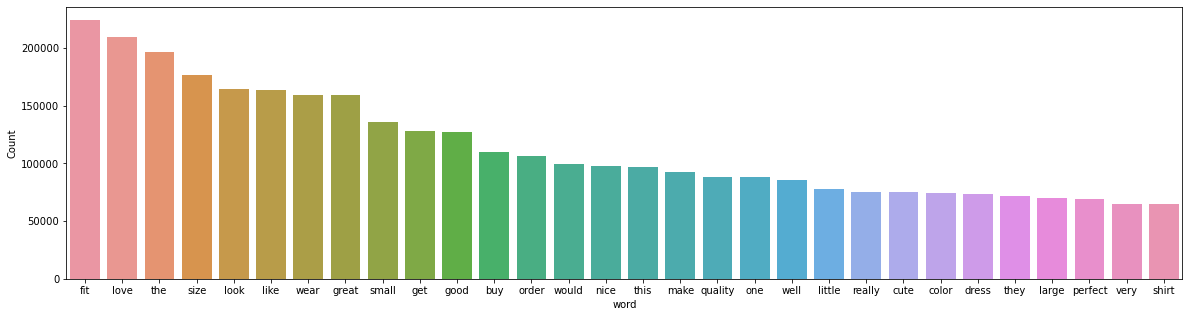

In [53]:
freq_words(df['clean'])

In [56]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

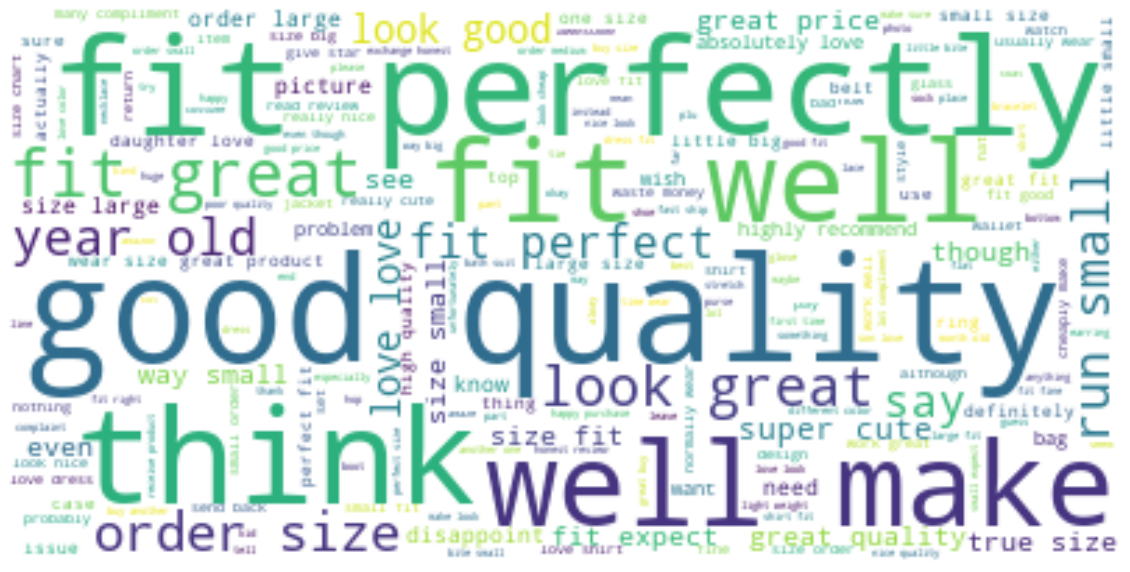

In [57]:
text = " ".join(i for i in df['clean'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Feature Extraction

In [60]:
from nltk.collocations import *
from nltk.util import ngrams

In [61]:
word_list = ' '.join([i for i in df['clean']]).split()

In [62]:
(pd.Series(nltk.ngrams(word_list, 2)).value_counts())[:20]

(look, like)        23879
(good, quality)     21112
(fit, perfectly)    18437
(well, make)        17674
(fit, well)         16530
(fit, great)        15681
(look, great)       15500
(order, size)       13892
(like, picture)     13021
(love, them)        12976
(year, old)         12300
(run, small)        12033
(fit, perfect)      11558
(look, good)        10980
(really, like)      10931
(love, love)        10820
(super, cute)       10674
(great, quality)    10366
(the, material)     10352
(way, small)         9711
dtype: int64

In [63]:
(pd.Series(nltk.ngrams(word_list, 3)).value_counts())[:20]

(look, like, picture)             4706
(love, love, love)                3264
(get, lot, compliment)            3115
(get, pay, for)                   2970
(get, many, compliment)           2772
(receive, product, discount)      2522
(nothing, like, picture)          2441
(honest, unbiased, review)        2305
(order, size, large)              2166
(would, buy, again)               2112
(look, nothing, like)             2100
(exchange, honest, review)        2019
(fit, true, size)                 1881
(would, definitely, recommend)    1877
(exchange, honest, unbiased)      1866
(discount, exchange, honest)      1865
(one, size, fit)                  1812
(look, exactly, like)             1790
(run, little, small)              1734
(exactly, like, picture)          1715
dtype: int64

In [64]:
search_word = ["love", "like", "hate", "great", "nice", 'the']

no_opinion = ' '.join((filter(lambda val: val not in search_word, list(word_list)))).split()

In [65]:
(pd.Series(nltk.ngrams(no_opinion, 2)).value_counts())[:20]

(good, quality)        21268
(fit, perfectly)       18441
(well, make)           17678
(fit, well)            16619
(order, size)          13963
(year, old)            12300
(run, small)           12043
(fit, perfect)         11728
(look, good)           11401
(super, cute)          10676
(way, small)            9716
(would, recommend)      9500
(size, small)           9462
(size, fit)             8907
(fit, expect)           8669
(true, size)            8023
(order, large)          7972
(size, large)           7907
(think, would)          7678
(highly, recommend)     7600
dtype: int64

In [66]:
(pd.Series(nltk.ngrams(no_opinion, 3)).value_counts())[:20]

(get, lot, compliment)            3123
(get, pay, for)                   2970
(get, many, compliment)           2787
(receive, product, discount)      2530
(honest, unbiased, review)        2305
(order, size, large)              2176
(would, buy, again)               2117
(exchange, honest, review)        2019
(fit, true, size)                 1942
(would, definitely, recommend)    1877
(exchange, honest, unbiased)      1866
(discount, exchange, honest)      1865
(one, size, fit)                  1827
(look, exactly, picture)          1738
(run, little, small)              1734
(receive, many, compliment)       1669
(year, old, daughter)             1656
(can, wait, wear)                 1546
(exactly, look, for)              1516
(fit, year, old)                  1466
dtype: int64

## Sentiment Analysis

In [67]:
review['overall'].value_counts()
df['rating'] = review['overall']

In [68]:
def label_func(rating):
    if rating <= 2:
        return 'negative'
    if rating >= 4:
        return 'positive'
    else:
        return 'neutral'

df['sentiment'] = df['rating'].apply(label_func)

In [69]:
positive_review = df[(df["sentiment"] == 'positive')]['clean'].to_frame()
neutral_review = df[(df["sentiment"] == 'neutral')]['clean'].to_frame()
negative_review = df[(df["sentiment"] == 'negative')]['clean'].to_frame()

In [70]:
pos_clean = ' '.join([i for i in positive_review['clean']]).split()
neutral_clean = ' '.join([i for i in neutral_review['clean']]).split()
neg_clean = ' '.join([i for i in negative_review['clean']]).split()

In [71]:
pos_clean = ' '.join((filter(lambda val: val not in search_word, list(pos_clean)))).split()
neutral_clean = ' '.join((filter(lambda val: val not in search_word, list(neutral_clean)))).split()
neg_clean = ' '.join((filter(lambda val: val not in search_word, list(neg_clean)))).split()

In [72]:
text_corpus_positive_review = ' '.join(pos_clean)
text_corpus_neutral_review = ' '.join(neutral_clean)
text_corpus_negative_review = ' '.join(neg_clean)

In [73]:
def most_common_word_func(text, n_words=25):

    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    n_words = n_words
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False).head(n_words)
    
    return df_fdist

In [74]:
df_most_common_words_text_corpus_positive_review = most_common_word_func(text_corpus_positive_review)
df_most_common_words_text_corpus_neutral_review = most_common_word_func(text_corpus_neutral_review)
df_most_common_words_text_corpus_negative_review = most_common_word_func(text_corpus_negative_review)

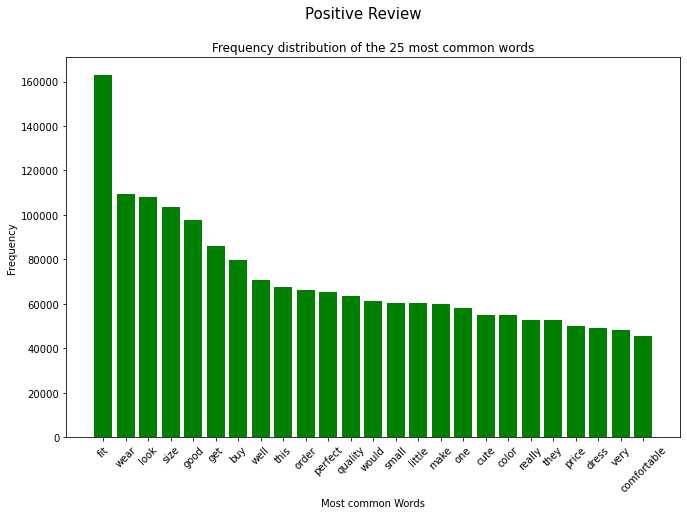

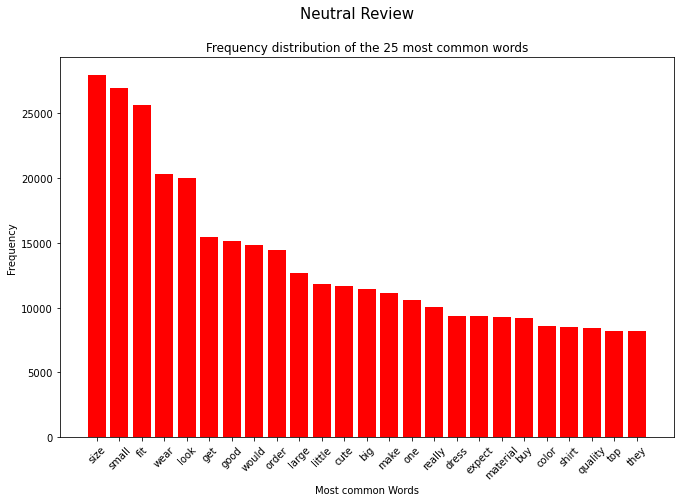

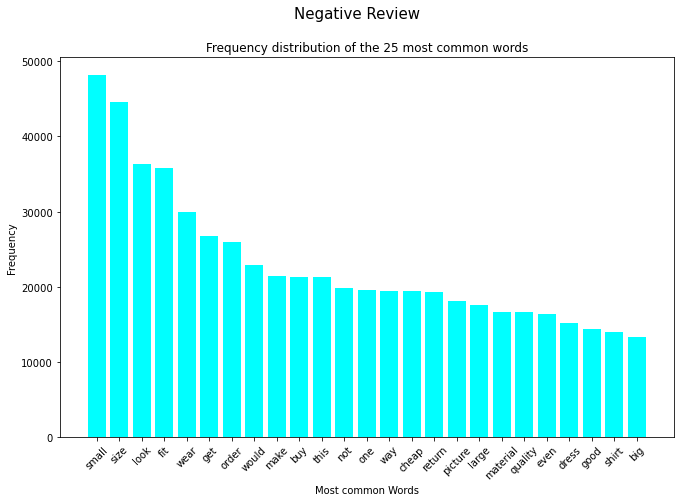

In [75]:
splited_data = [df_most_common_words_text_corpus_positive_review,
                df_most_common_words_text_corpus_neutral_review,
                df_most_common_words_text_corpus_negative_review]

color_list = ['green', 'red', 'cyan']
title_list = ['Positive Review', 'Neutral Review', 'Negative Review']


for item in range(3):
    plt.figure(figsize=(11,7))
    plt.bar(splited_data[item]['Word'], 
            splited_data[item]['Frequency'],
            color=color_list[item])
    plt.xticks(rotation = 45)
    plt.xlabel('Most common Words')
    plt.ylabel("Frequency")
    plt.title("Frequency distribution of the 25 most common words")
    plt.suptitle(title_list[item], fontsize=15)
    plt.show()

## Topic Modeling

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

dictionary = corpora.Dictionary(df['tokenized'])

In [77]:
doc_term_matrix = [dictionary.doc2bow(word) for word in df['tokenized']]

In [78]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [192]:
##lda_model_1 = Lda_object(DT_matrix, num_topics=2, id2word = dictionary)

print(lda_model.print_topics(num_topics=6, num_words=5))

[(4, '0.113*"needed" + 0.045*"use" + 0.039*"trying" + 0.023*"new" + 0.023*"level"'), (2, '0.052*"new" + 0.042*"instead" + 0.025*"heartbeat" + 0.025*"came" + 0.023*"choose"'), (3, '0.055*"kudos" + 0.034*"apart" + 0.031*"holes" + 0.026*"to" + 0.026*"years"'), (5, '0.119*"needed" + 0.017*"would" + 0.014*"shame" + 0.011*"wish" + 0.011*"three"'), (6, '0.164*"pack" + 0.085*"new" + 0.068*"needed" + 0.029*"usa" + 0.029*"much"'), (1, '0.050*"needed" + 0.033*"apart" + 0.023*"securely" + 0.023*"new" + 0.012*"stretching"')]


In [439]:
from textblob import TextBlob

df = data_tmp # Temporary code, just to reduce data size for faster computation

def norm_lemm_v_a_func_token(text):
    '''
    Lemmatize tokens
    
    Step 1: Use WordNetLemmatizer() with POS tag 'v' to lemmatize the created tokens     
    Step 2: Use WordNetLemmatizer() with POS tag 'a' to lemmatize the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    '''

    text1 = [WordNetLemmatizer().lemmatize(word, pos='v') for word in text]
    text2 = [WordNetLemmatizer().lemmatize(word, pos='a') for word in text1]
    return text2

# Filter out nouns (product-related features), verbs and subjective adverbs & adjs which reflect strong customer opinions.
word_len_threshold = 2
df['tagged_filtered'] = df['tagged'].apply(lambda x: [word for word, tag in x 
                                                    if len(word) > word_len_threshold and
                                                        (   tag.startswith("N") 
                                                        or tag.startswith("V")
                                                        or (tag.startswith("RB") and TextBlob(word).sentiment.subjectivity>0)
                                                        or (tag.startswith("J") and TextBlob(word).sentiment.subjectivity>0)  )])

df["tokenized_filtered"] = df['tagged_filtered'].apply(norm_lemm_v_a_func_token)

df

<ipython-input-439-47dbce65c509>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tagged_filtered'] = df['tagged'].apply(lambda x: [word for word, tag in x
<ipython-input-439-47dbce65c509>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokenized_filtered"] = df['tagged_filtered'].apply(norm_lemm_v_a_func_token)


,reviewTime,reviewerID,reviewerName,vote,reviewText,noStopword,tokenized,tagged,nouns,verbs,Token_Count,lemmatized,clean,rating,sentiment,adjs,bigram,adverbs,tagged_filtered,tokenized_filtered
1,2014-09-28,A3DDWDH9PX2YX2,Sonja Lau,3.0,"I agree with the other review, the opening is too small. I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen. Would not buy...",i agree review opening small i almost bent hook expensive earrings trying get higher end they re seen would buy price sending back,"[i, agree, review, opening, small, i, almost, bent, hook, expensive, earrings, trying, get, higher, end, they, re, seen, would, buy, price, sending, back]","[(i, JJ), (agree, VBP), (review, NN), (opening, VBG), (small, JJ), (i, NN), (almost, RB), (bent, JJ), (hook, NN), (expensive, JJ), (earrings, NNS), (trying, VBG), (get, VB), (higher, JJR), (end, N...","[review, i, hook, earrings, end, price]","[agree, opening, trying, get, re, seen, buy, sending]",23,i agree review open small i almost bend hook expensive earrings try get high end they re see would buy price send back,agree review open small almost bend hook expensive earrings try get high end they see would buy price send back,2,negative,"[i, small, bent, expensive, higher]","[agree review, review open, open small, small almost, almost bend, bend hook, hook expensive, expensive earrings, earrings try, try get, get high, high end, end they, they see, see would, would bu...",[almost],"[agree, review, opening, small, hook, expensive, earrings, trying, get, higher, end, seen, buy, price, sending]","[agree, review, open, small, hook, expensive, earrings, try, get, high, end, see, buy, price, send]"
14,2010-03-12,A1Y36BSE9GKXLV,Ms Irish,2.0,"Received the case in less than a week...was very satisfied with the product...only one problem...not really a problem with product, but with price as inside the product was a Buxton tag that showe...",received case less week was satisfied product only one problem not really problem product price inside product buxton tag showed sugg retail i paid hmmm didn t quite underst...,"[received, case, less, week, was, satisfied, product, only, one, problem, not, really, problem, product, price, inside, product, buxton, tag, showed, sugg, retail, i, paid, hmmm, didn, t, quite, u...","[(received, VBN), (case, NN), (less, RBR), (week, NN), (was, VBD), (satisfied, JJ), (product, NN), (only, RB), (one, CD), (problem, NN), (not, RB), (really, RB), (problem, NN), (product, NN), (pri...","[case, week, product, problem, problem, product, price, product, buxton, tag, i, hmmm, didn, buxton, site, i, product, price]","[received, was, showed, paid, t, understand, going, do, beware, think, i, gone, obtain]",49,receive case less week be satisfy product only one problem not really problem product price inside product buxton tag show sugg retail i pay hmmm didn t quite understand this go do beware as i thi...,receive case less week satisfy product only one problem not really problem product price inside product buxton tag show sugg retail pay hmmm didn quite understand this beware think buxton web site...,4,positive,"[satisfied, sugg, retail, i, able, sugg, retail]","[receive case, case less, less week, week satisfy, satisfy product, product only, only one, one problem, problem not, not really, really problem, problem product, product price, price inside, insi...","[less, only, not, really, quite]","[received, case, less, week, was, satisfied, product, only, problem, really, problem, product, price, product, buxton, tag, showed, paid, hmmm, didn, understand, going, beware, think, gone, buxton...","[receive, case, less, week, be, satisfy, product, only, problem, really, problem, product, price, product, buxton, tag, show, pay, hmmm, didn, understand, go, beware, think, go, buxton, site, able..."
63,2015-06-04,AY7PVQ0RIC71D,Debra McCarty,8.0,"I had been looking for a replacement for a cigarette case I'd had for o

In [440]:
# Divide dictonary into three sentiment states to understand the main user opinions in each of them.
df_pos = df[df.sentiment=="positive"]
df_neu = df[df.sentiment=="neutral"]
df_neg = df[df.sentiment=="negative"]

pos_dictionary = corpora.Dictionary(df_pos['tokenized_filtered'])
neu_dictionary = corpora.Dictionary(df_neu['tokenized_filtered'])
neg_dictionary = corpora.Dictionary(df_neg['tokenized_filtered'])

# Filter out tokens appear in 1) less than 1% of all reviews. (less representative) (no ) 2) more than 80% of all reviews (no benefit for topic distinguishing).
pos_dictionary.filter_extremes(no_below=0.01*len(pos_dictionary.token2id), no_above=0.8) 
neu_dictionary.filter_extremes(no_below=0.01*len(neu_dictionary.token2id), no_above=0.8) 
neg_dictionary.filter_extremes(no_below=0.01*len(neg_dictionary.token2id), no_above=0.8)

pos_doc_term_matrix = [pos_dictionary.doc2bow(word) for word in df_pos['tokenized_filtered']]
neu_doc_term_matrix = [neu_dictionary.doc2bow(word) for word in df_neu['tokenized_filtered']]
neg_doc_term_matrix = [neg_dictionary.doc2bow(word) for word in df_neg['tokenized_filtered']]

In [ ]:
# LDA model parameter tuning

# from gensim.test.utils import common_texts
# from gensim.corpora.dictionary import Dictionary

# lda = gensim.models.ldamodel.LdaModel(corpus=pos_doc_term_matrix,
#                                            #id2word=pos_dictionary,
#                                            num_topics=20, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)

pos_lda_model = LDA(corpus=pos_doc_term_matrix, id2word=pos_dictionary, num_topics=10, random_state=100, chunksize=100, passes=10)
neu_lda_model = LDA(corpus=neu_doc_term_matrix, id2word=neu_dictionary, num_topics=10, random_state=100, chunksize=100, passes=10)
neg_lda_model = LDA(corpus=neg_doc_term_matrix, id2word=neg_dictionary, num_topics=10, random_state=100, chunksize=100, passes=10)

In [442]:
# Aggregate review tokens into bi-grams and tri-grams to better understand structured user opinions instead of scattered words.
def ngram(text):
    """
    Transform the review text into all bigram and trigram combinations.
    
    Input: String of text.
    
    Output: A list of all bigram and trigram combinations of the input text. Each combination is a string.
    
    """
    return [" ".join(phrase) for phrase in list(nltk.ngrams(text.split(), 2))] + [" ".join(phrase) for phrase in list(nltk.ngrams(text.split(), 3))]


df["bigram"] = df["clean"].apply(ngram)

# Divide dictonary into three sentiment states to understand the main user opinions in each of them.
df_pos_ng = df[df.sentiment=="positive"]
df_neu_ng = df[df.sentiment=="neutral"]
df_neg_ng = df[df.sentiment=="negative"]

ng_pos_dictionary = corpora.Dictionary(df_pos_ng['bigram'])
ng_neu_dictionary = corpora.Dictionary(df_neu_ng['bigram'])
ng_neg_dictionary = corpora.Dictionary(df_neg_ng['bigram'])

# Filter out tokens appear in 1) less than 1% of all reviews. (less representative) (no ) 2) more than 80% of all reviews (no benefit for topic distinguishing).
ng_pos_dictionary.filter_extremes(no_below=0.01*len(ng_pos_dictionary.token2id), no_above=0.8) 
ng_neu_dictionary.filter_extremes(no_below=0.01*len(ng_neu_dictionary.token2id), no_above=0.8) 
ng_neg_dictionary.filter_extremes(no_below=0.01*len(ng_neg_dictionary.token2id), no_above=0.8)

ng_pos_doc_term_matrix = [ng_pos_dictionary.doc2bow(word) for word in df_pos_ng['bigram']]
ng_neu_doc_term_matrix = [ng_neu_dictionary.doc2bow(word) for word in df_neu_ng['bigram']]
ng_neg_doc_term_matrix = [ng_neg_dictionary.doc2bow(word) for word in df_neg_ng['bigram']]

df

<ipython-input-442-3a0db64c3edc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bigram"] = df["clean"].apply(ngram)


,reviewTime,reviewerID,reviewerName,vote,reviewText,noStopword,tokenized,tagged,nouns,verbs,Token_Count,lemmatized,clean,rating,sentiment,adjs,bigram,adverbs,tagged_filtered,tokenized_filtered
1,2014-09-28,A3DDWDH9PX2YX2,Sonja Lau,3.0,"I agree with the other review, the opening is too small. I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen. Would not buy...",i agree review opening small i almost bent hook expensive earrings trying get higher end they re seen would buy price sending back,"[i, agree, review, opening, small, i, almost, bent, hook, expensive, earrings, trying, get, higher, end, they, re, seen, would, buy, price, sending, back]","[(i, JJ), (agree, VBP), (review, NN), (opening, VBG), (small, JJ), (i, NN), (almost, RB), (bent, JJ), (hook, NN), (expensive, JJ), (earrings, NNS), (trying, VBG), (get, VB), (higher, JJR), (end, N...","[review, i, hook, earrings, end, price]","[agree, opening, trying, get, re, seen, buy, sending]",23,i agree review open small i almost bend hook expensive earrings try get high end they re see would buy price send back,agree review open small almost bend hook expensive earrings try get high end they see would buy price send back,2,negative,"[i, small, bent, expensive, higher]","[agree review, review open, open small, small almost, almost bend, bend hook, hook expensive, expensive earrings, earrings try, try get, get high, high end, end they, they see, see would, would bu...",[almost],"[agree, review, opening, small, hook, expensive, earrings, trying, get, higher, end, seen, buy, price, sending]","[agree, review, open, small, hook, expensive, earrings, try, get, high, end, see, buy, price, send]"
14,2010-03-12,A1Y36BSE9GKXLV,Ms Irish,2.0,"Received the case in less than a week...was very satisfied with the product...only one problem...not really a problem with product, but with price as inside the product was a Buxton tag that showe...",received case less week was satisfied product only one problem not really problem product price inside product buxton tag showed sugg retail i paid hmmm didn t quite underst...,"[received, case, less, week, was, satisfied, product, only, one, problem, not, really, problem, product, price, inside, product, buxton, tag, showed, sugg, retail, i, paid, hmmm, didn, t, quite, u...","[(received, VBN), (case, NN), (less, RBR), (week, NN), (was, VBD), (satisfied, JJ), (product, NN), (only, RB), (one, CD), (problem, NN), (not, RB), (really, RB), (problem, NN), (product, NN), (pri...","[case, week, product, problem, problem, product, price, product, buxton, tag, i, hmmm, didn, buxton, site, i, product, price]","[received, was, showed, paid, t, understand, going, do, beware, think, i, gone, obtain]",49,receive case less week be satisfy product only one problem not really problem product price inside product buxton tag show sugg retail i pay hmmm didn t quite understand this go do beware as i thi...,receive case less week satisfy product only one problem not really problem product price inside product buxton tag show sugg retail pay hmmm didn quite understand this beware think buxton web site...,4,positive,"[satisfied, sugg, retail, i, able, sugg, retail]","[receive case, case less, less week, week satisfy, satisfy product, product only, only one, one problem, problem not, not really, really problem, problem product, product price, price inside, insi...","[less, only, not, really, quite]","[received, case, less, week, was, satisfied, product, only, problem, really, problem, product, price, product, buxton, tag, showed, paid, hmmm, didn, understand, going, beware, think, gone, buxton...","[receive, case, less, week, be, satisfy, product, only, problem, really, problem, product, price, product, buxton, tag, show, pay, hmmm, didn, understand, go, beware, think, go, buxton, site, able..."
63,2015-06-04,AY7PVQ0RIC71D,Debra McCarty,8.0,"I had been looking for a replacement for a cigarette case I'd had for o

In [ ]:
# LDA model parameter tuning
ng_pos_lda_model = LDA(corpus=ng_pos_doc_term_matrix, id2word=ng_pos_dictionary, num_topics=8, random_state=100, chunksize=1000, passes=50)
ng_neu_lda_model = LDA(corpus=ng_neu_doc_term_matrix, id2word=ng_neu_dictionary, num_topics=8, random_state=100, chunksize=1000, passes=50)
ng_neg_lda_model = LDA(corpus=ng_neg_doc_term_matrix, id2word=ng_neg_dictionary, num_topics=8, random_state=100, chunksize=1000, passes=50)

## Feature Extraction

In [452]:
# Create an overall table that takes other variables into consideration
data = pd.concat([review[["reviewTime", "reviewerID","reviewerName","vote"]], df], axis=1).reset_index(drop=True)
data = data[data.Token_Count>2]
data["vote"].fillna(0, inplace=True)
data["reviewTime"] = ["-".join(np.array(date.replace(",", "").split())[[2,0,1]]) for date in data["reviewTime"]]
data["reviewTime"] = [datetime. strptime(date[:-1]+"0"+date[-1], '%Y-%m-%d') if len(date)<10 
                                      else datetime. strptime(date, '%Y-%m-%d') for date in data["reviewTime"]]
max_date = data["reviewTime"].max()
data["day_gap"] = [(max_date - date).days for date in data["reviewTime"]]
data["year-month"] = [date.strftime("%Y-%m") for date in data["reviewTime"]]
data["year"] = [date.strftime("%Y") for date in data["reviewTime"]]
data.head(3)

,reviewTime,reviewerID,reviewerName,vote,reviewText,noStopword,tokenized,tagged,nouns,verbs,...,lemmatized,clean,rating,sentiment,adjs,bigram,adverbs,day_gap,year-month,year
0,2014-10-20,A1D4G1SNUZWQOT,Tracy,0.0,Exactly what I needed.,exactly i needed,"[exactly, i, needed]","[(exactly, RB), (i, NN), (needed, VBD)]",[i],[needed],...,exactly i need,exactly need,5,positive,[],[exactly need],[exactly],1442,2014-10,2014
1,2014-09-28,A3DDWDH9PX2YX2,Sonja Lau,3.0,"I agree with the other review, the opening is too small. I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen. Would not buy...",i agree review opening small i almost bent hook expensive earrings trying get higher end they re seen would buy price sending back,"[i, agree, review, opening, small, i, almost, bent, hook, expensive, earrings, trying, get, higher, end, they, re, seen, would, buy, price, sending, back]","[(i, JJ), (agree, VBP), (review, NN), (opening, VBG), (small, JJ), (i, NN), (almost, RB), (bent, JJ), (hook, NN), (expensive, JJ), (earrings, NNS), (trying, VBG), (get, VB), (higher, JJR), (end, N...","[review, i, hook, earrings, end, price]","[agree, opening, trying, get, re, seen, buy, sending]",...,i agree review open small i almost bend hook expensive earrings try get high end they re see would buy price send back,agree review open small almost bend hook expensive earrings try get high end they see would buy price send back,2,negative,"[i, small, bent, expensive, higher]","[agree review, review open, open small, small almost, almost bend, bend hook, hook expensive, expensive earrings, earrings try, try get, get high, high end, end they, they see, see would, would bu...",[almost],1464,2014-09,2014
2,2014-08-25,A2MWC41EW7XL15,Kathleen,0.0,Love these... I am going to order another pack to keep in work; someone (including myself) is always losing the back to an earring. I don't understand why all fish hook earrings don't have them. ...,love these i going order another pack keep work someone including myself always losing back earring i understand fish hook earrings them just wish tiny bit longer,"[love, these, i, going, order, another, pack, keep, work, someone, including, myself, always, losing, back, earring, i, understand, fish, hook, earrings, them, just, wish, tiny, bit, longer]","[(love, IN), (these, DT), (i, NNS), (going, VBG), (order, NN), (another, DT), (pack, NN), (keep, NN), (work, NN), (someone, NN), (including, VBG), (myself, PRP), (always, RB), (losing, VBG), (back...","[i, order, pack, keep, work, someone, i, hook, bit]","[going, including, losing, earring, understand, earrings, wish]",...,love these i go order another pack keep work someone include myself always lose back earring i understand fish hook earrings them just wish tiny bite long,love these order another pack keep work someone include myself always lose back earring understand fish hook earrings them just wish tiny bite long,4,positive,"[fish, tiny]","[love these, these order, order another, another pack, pack keep, keep work, work someone, someone include, include myself, myself always, always lose, lose back, back earring, earring understand,...","[always, just, longer]",1498,2014-08,2014


In [453]:
# Check missing values: Only reviewerName has 81 missing values, could be ignored for now.
data.isnull().sum()

reviewTime       0
reviewerID       0
reviewerName    81
vote             0
reviewText       0
noStopword       0
tokenized        0
tagged           0
nouns            0
verbs            0
Token_Count      0
lemmatized       0
clean            0
rating           0
sentiment        0
adjs             0
bigram           0
adverbs          0
day_gap          0
year-month       0
year             0
dtype: int64

In [455]:
data["vote"].sort_values().value_counts()

0.0      694924
2.0       31517
3.0       14913
4.0        8049
5.0        5196
          ...  
203.0         1
206.0         1
143.0         1
222.0         1
966.0         1
Name: vote, Length: 201, dtype: int64

In [458]:
data[["vote","day_gap"]].corr()

,vote,day_gap
vote,1.00000,0.07995
day_gap,0.07995,1.00000


A high portion of review votes are 0, indicating they were not endorsed (or viewed) by any readers. The correlation between helpfulness votes and review publish dates (day_gap = max publish date - this review's publish date, counted in days) is low, indicating review views induced by publish time might not affect votes significantly.

In [456]:
data["rating"].sort_values().value_counts()

5    391061
4    133997
1     97926
3     89810
2     60059
Name: rating, dtype: int64

Text(0.5, 1.0, 'Distribution of User Ratings')

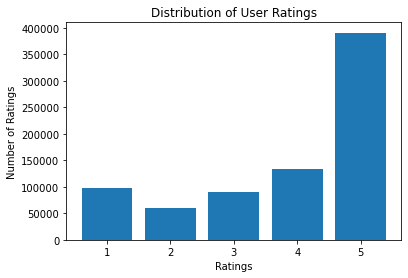

In [457]:
rating = pd.Series(data["rating"].value_counts()).sort_index()

plt.bar(rating.index, rating.values)
plt.xlabel("Ratings")
plt.ylabel("Number of Ratings")
plt.title("Distribution of User Ratings")

In [469]:
# Extract review features for importance ranking
import readability

data_tmp = data[data.vote>0] # For computation time, here I picked a subset of the whole dataset (reviews with votes>0).
#df_copy = df.copy()
#df = df.reset_index(drop=True).iloc[data.index.values]

feature = pd.DataFrame()
feature["rating"] = data_tmp["rating"]
feature["vote"]  = data_tmp["vote"]
feature["length"] = data_tmp["Token_Count"]
feature["prop_of_noun"] = data_tmp["nouns"].str.len() / feature["length"]
feature["prop_of_verb"] = data_tmp["verbs"].str.len() / feature["length"]
feature["prop_of_adj_adverb"] = (data_tmp["adjs"].str.len() + data_tmp["adverbs"].str.len()) / feature["length"]
feature["subjectivity"] = data_tmp["clean"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
feature["readability"] = data_tmp["reviewText"].apply(lambda x: readability.getmeasures(x, lang='en')['readability grades']['FleschReadingEase'])
feature

,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
1,2,3.0,23,0.260870,0.347826,0.260870,0.428000,65.530000
14,4,2.0,49,0.367347,0.265306,0.244898,0.472917,26.150690
63,5,8.0,78,0.256410,0.282051,0.294872,0.614867,-25.770522
95,1,7.0,32,0.468750,0.187500,0.218750,0.609524,47.235000
98,3,2.0,11,0.363636,0.000000,0.545455,0.500000,63.695000
...,...,...,...,...,...,...,...,...
881851,1,2.0,57,0.350877,0.228070,0.298246,0.473333,66.220000
881855,2,7.0,70,0.314286,0.242857,0.300000,0.479683,-7.173966
881877,3,3.0,38,0.315789,0.236842,0.342105,0.712946,40.027671
881894,4,5.0,42,0.333333,0.309524,0.238095,0.750000,42.552027


In [416]:
feature.corr() # No strong correlation feature pair existed

,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
rating,1.000000,0.024695,0.059180,0.009570,-0.029208,0.061286,0.249867,-0.052308
vote,0.024695,1.000000,0.146541,0.012848,0.024751,-0.027879,-0.012238,-0.077458
length,0.059180,0.146541,1.000000,0.004148,0.074454,-0.089161,-0.077846,-0.596364
prop_of_noun,0.009570,0.012848,0.004148,1.000000,-0.362564,-0.433244,-0.001984,-0.005143
prop_of_verb,-0.029208,0.024751,0.074454,-0.362564,1.000000,-0.408117,-0.088917,-0.065020
prop_of_adj_adverb,0.061286,-0.027879,-0.089161,-0.433244,-0.408117,1.000000,0.112594,0.005353
subjectivity,0.249867,-0.012238,-0.077846,-0.001984,-0.088917,0.112594,1.000000,0.016354
readability,-0.052308,-0.077458,-0.596364,-0.005143,-0.065020,0.005353,0.016354,1.000000


## Feature Importance

In [461]:
# Which feature best reflects user sentiment polarity (user satisfaction)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
                                                        feature.iloc[:,1:].to_numpy(), data_tmp["rating"].to_numpy().reshape(-1), test_size=0.2, random_state=42)

In [ ]:
# The grid search CV was costing too much time and will be ran later. For the code below, an initial set of params were used.
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)

In [ ]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

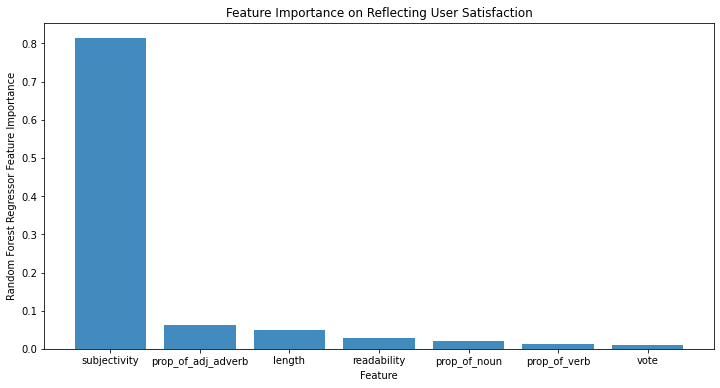

In [415]:
# Visualizations of Feature Importance
feature_name = feature.columns.values[1:][np.argsort(rf.feature_importances_)][::-1]
feature_importance = np.sort(rf.feature_importances_)[::-1]

fig = plt.figure(figsize=(12, 6))
plt.bar(feature_name, feature_importance, alpha=0.85)
plt.title("Feature Importance on Reflecting User Satisfaction")
plt.xlabel("Feature")
plt.ylabel("Random Forest Regressor Feature Importance")
plt.show()

It is observed that subjectivity has the highest feature importance on reflecting user satisfaction, followed by proportion of adjs & adverbs, length readability. This indicated that users with higher product satisfaction tended to give more subjective comments on the product, using higher portion of adjs and adverbs to highlight their feelings and satisfaction towards the product. Besides, users with higher satisfaction tended to write a longer review to document their experience in detail with higher corresponding text readability.

In [411]:
# Which features best influences review helpfulness
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
                                                        feature[["rating"] + list(feature.columns)[2:]].to_numpy(), data_tmp["vote"].to_numpy().reshape(-1), 
                                                        test_size=0.2, random_state=42)

In [ ]:
# The grid search CV was costing too much time and will be ran later. For the code below, an initial set of params were used.
grid_vote = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

## Grid Search function
CV_rfr_vote = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_vote, cv= 5)
CV_rfr_vote.fit(X_train, y_train)

In [ ]:
rf_vote = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

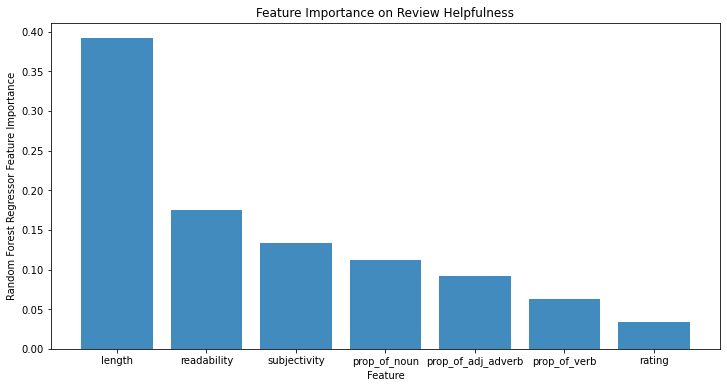

In [414]:
# Visualizations of Feature Importance
feature_name = np.array(["rating"] + list(feature.columns)[2:])[np.argsort(rf_vote.feature_importances_)][::-1]
feature_importance = np.sort(rf_vote.feature_importances_)[::-1]

fig = plt.figure(figsize=(12, 6))
plt.bar(feature_name, feature_importance, alpha=0.85)
plt.title("Feature Importance on Review Helpfulness")
plt.xlabel("Feature")
plt.ylabel("Random Forest Regressor Feature Importance")
plt.show()

Length is the most important feature that impacts review helpfulness, followed by readability, subjectivity, proportion of nouns. This implied that long reviews with good readability and subjective opinions had higher probability to be endorsed by readers since they provided more information on the product. The proportion of nouns might be correlated to the proportion of product-related feature terms mentioned in the reviews. A higher proportion of product-related feature terms indicated that more product features were discussed and evaluated in the reviews, thus providing readers with more relevant information on the product.

## Data Visualizations

In [470]:
# Aggregate current data for visualizations

feature_visual = pd.concat([data_tmp[["reviewTime","day_gap","year-month","year"]], feature], axis=1).reset_index(drop=True)
feature_visual

,reviewTime,day_gap,year-month,year,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
0,2014-09-28,1464,2014-09,2014,2,3.0,23,0.260870,0.347826,0.260870,0.428000,65.530000
1,2010-03-12,3125,2010-03,2010,4,2.0,49,0.367347,0.265306,0.244898,0.472917,26.150690
2,2015-06-04,1215,2015-06,2015,5,8.0,78,0.256410,0.282051,0.294872,0.614867,-25.770522
3,2013-08-05,1883,2013-08,2013,1,7.0,32,0.468750,0.187500,0.218750,0.609524,47.235000
4,2017-04-22,527,2017-04,2017,3,2.0,11,0.363636,0.000000,0.545455,0.500000,63.695000
...,...,...,...,...,...,...,...,...,...,...,...,...
77924,2017-01-11,628,2017-01,2017,1,2.0,57,0.350877,0.228070,0.298246,0.473333,66.220000
77925,2016-08-06,786,2016-08,2016,2,7.0,70,0.314286,0.242857,0.300000,0.479683,-7.173966
77926,2017-02-24,584,2017-02,2017,3,3.0,38,0.315789,0.236842,0.342105,0.712946,40.027671
77927,2017-02-21,587,2017-02,2017,4,5.0,42,0.333333,0.309524,0.238095,0.750000,42.552027


In [471]:
# Correlation analysis

feature_visual.corr()

,day_gap,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
day_gap,1.000000,0.012406,0.060718,0.027939,-0.002704,0.020263,-0.039157,0.013374,-0.029552
rating,0.012406,1.000000,0.024695,0.059180,0.009570,-0.029208,0.061286,0.249867,-0.052308
vote,0.060718,0.024695,1.000000,0.146541,0.012848,0.024751,-0.027879,-0.012238,-0.077458
length,0.027939,0.059180,0.146541,1.000000,0.004148,0.074454,-0.089161,-0.077846,-0.596364
prop_of_noun,-0.002704,0.009570,0.012848,0.004148,1.000000,-0.362564,-0.433244,-0.001984,-0.005143
prop_of_verb,0.020263,-0.029208,0.024751,0.074454,-0.362564,1.000000,-0.408117,-0.088917,-0.065020
prop_of_adj_adverb,-0.039157,0.061286,-0.027879,-0.089161,-0.433244,-0.408117,1.000000,0.112594,0.005353
subjectivity,0.013374,0.249867,-0.012238,-0.077846,-0.001984,-0.088917,0.112594,1.000000,0.016354
readability,-0.029552,-0.052308,-0.077458,-0.596364,-0.005143,-0.065020,0.005353,0.016354,1.000000


D:\Tools\Anaconda\lib\site-packages\seaborn\matrix.py:68: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape, np.bool)
D:\Tools\Anaconda\lib\site-packages\seaborn\matrix.py:78: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.bool)


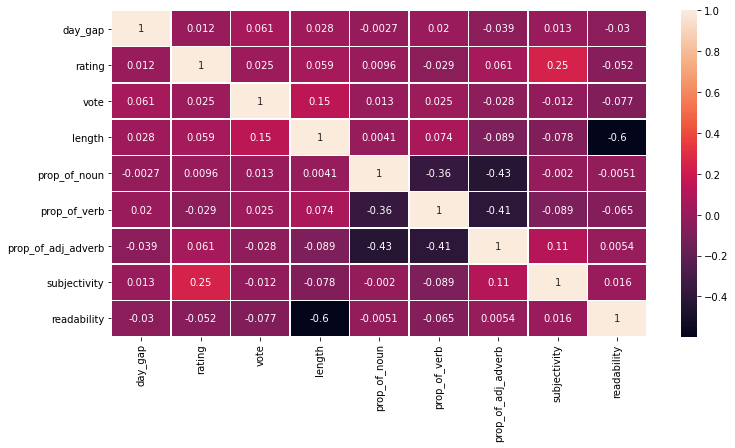

In [475]:
fig = plt.figure(figsize=(12, 6))
sns.heatmap(feature_visual.corr(), annot=True, linewidth=.5)

No strong correlation pairs existed.

In [477]:
# Trend Analysis

# Aggregate the features by year, taking mean as the aggregation method.
trend_data_by_year = feature_visual.iloc[:, 3:].groupby("year").mean().reset_index()
trend_data_by_year

,year,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
0,2002,4.250000,17.250000,100.500000,0.448113,0.162451,0.269159,0.545137,22.907797
1,2003,3.857143,6.428571,34.428571,0.320449,0.210745,0.312738,0.536742,74.430700
2,2004,3.666667,9.458333,71.375000,0.359316,0.217426,0.312755,0.519709,26.119473
3,2005,3.528090,7.887640,53.550562,0.357958,0.218190,0.272899,0.540719,34.529557
4,2006,3.938356,8.226027,44.910959,0.355207,0.217783,0.287514,0.545278,46.568871
5,2007,3.976496,5.594017,36.948718,0.360469,0.218223,0.280063,0.559435,52.687242
6,2008,3.887550,8.180723,40.586345,0.363688,0.219597,0.274488,0.557400,47.950730
7,2009,4.025276,10.135861,48.617694,0.356696,0.222902,0.277510,0.553491,45.935279
8,2010,3.908563,8.603774,49.330914,0.360812,0.228030,0.273920,0.541953,39.162274
9,2011,3.775378,7.422246,48.022678,0.359508,0.222829,0.280918,0.541125,41.679580


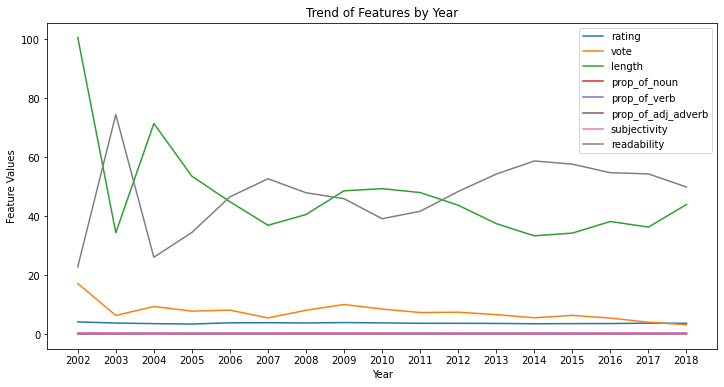

In [487]:
fig = plt.figure(figsize=(12, 6))
plt.plot(trend_data_by_year["year"], trend_data_by_year["rating"], label = "rating")
plt.plot(trend_data_by_year["year"], trend_data_by_year["vote"], label = "vote")
plt.plot(trend_data_by_year["year"], trend_data_by_year["length"], label = "length")
plt.plot(trend_data_by_year["year"], trend_data_by_year["prop_of_noun"], label = "prop_of_noun")
plt.plot(trend_data_by_year["year"], trend_data_by_year["prop_of_verb"], label = "prop_of_verb")
plt.plot(trend_data_by_year["year"], trend_data_by_year["prop_of_adj_adverb"], label = "prop_of_adj_adverb")
plt.plot(trend_data_by_year["year"], trend_data_by_year["subjectivity"], label = "subjectivity")
plt.plot(trend_data_by_year["year"], trend_data_by_year["readability"], label = "readability")
plt.xlabel("Year")
plt.ylabel("Feature Values")
plt.title("Trend of Features by Year")
plt.legend()

[Text(0, 0.5, 'Feature Values'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Trend of readability by year')]

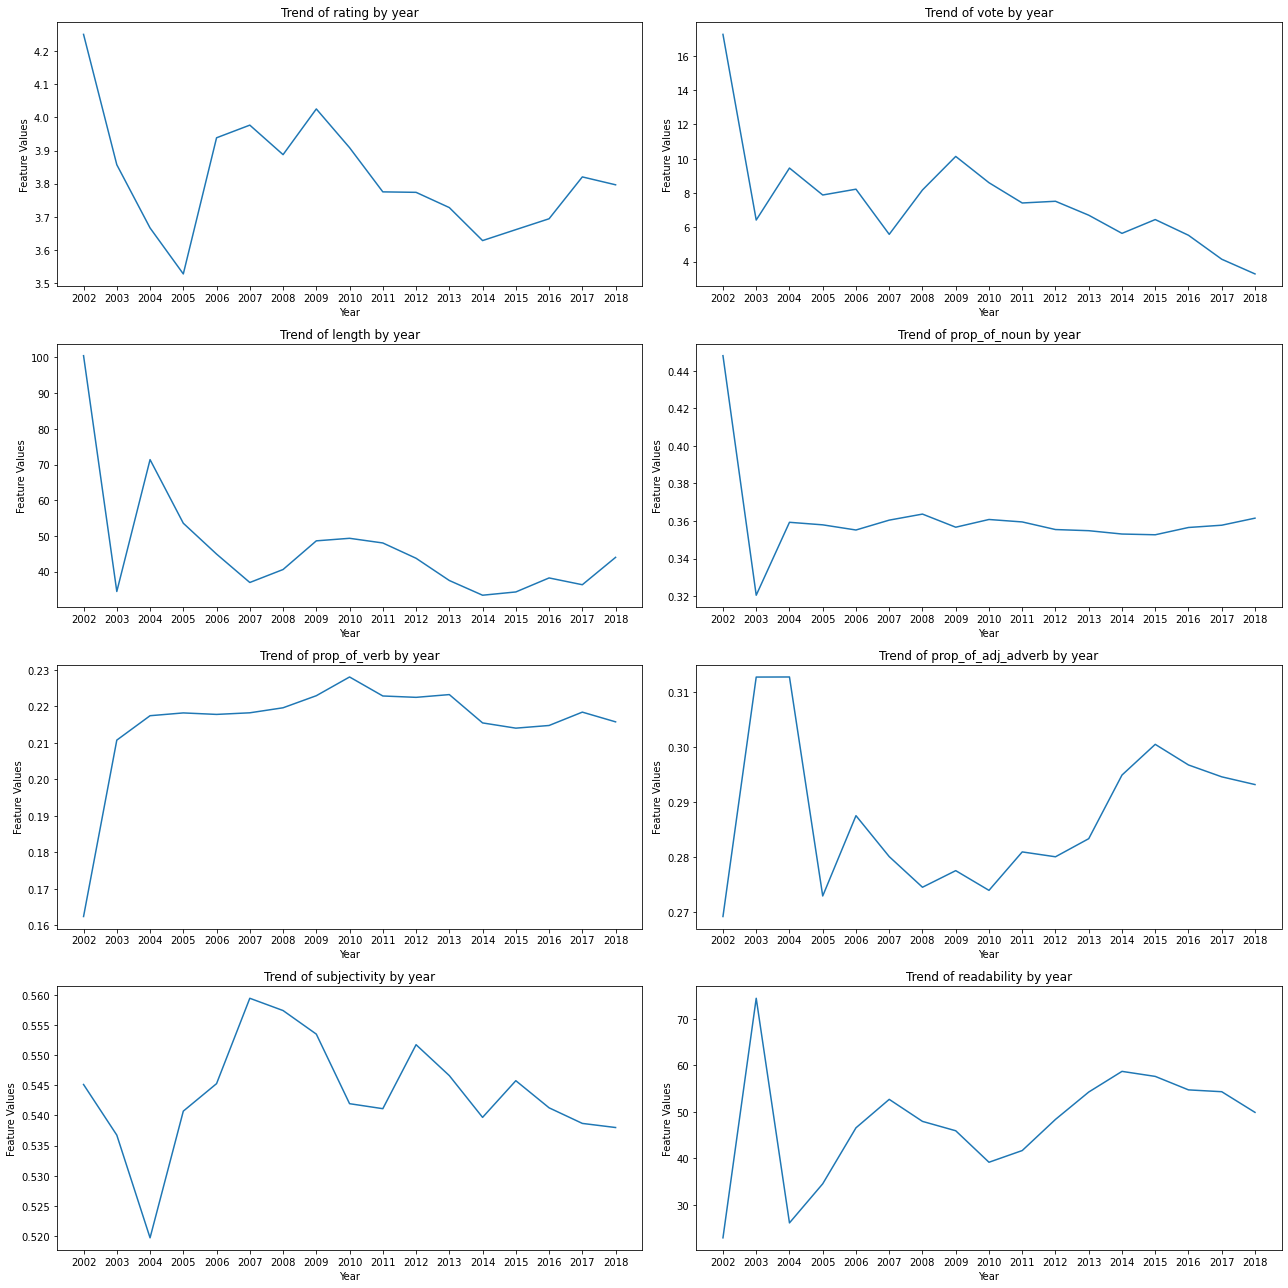

In [499]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(18, 18), tight_layout=True)
axes[0][0].plot(trend_data_by_year["year"], trend_data_by_year["rating"], label = "rating")
axes[0][0].set(title="Trend of rating by year", xlabel="Year", ylabel="Feature Values")
axes[0][1].plot(trend_data_by_year["year"], trend_data_by_year["vote"], label = "vote")
axes[0][1].set(title="Trend of vote by year", xlabel="Year", ylabel="Feature Values")
axes[1][0].plot(trend_data_by_year["year"], trend_data_by_year["length"], label = "length")
axes[1][0].set(title="Trend of length by year", xlabel="Year", ylabel="Feature Values")
axes[1][1].plot(trend_data_by_year["year"], trend_data_by_year["prop_of_noun"], label = "prop_of_noun")
axes[1][1].set(title="Trend of prop_of_noun by year", xlabel="Year", ylabel="Feature Values")
axes[2][0].plot(trend_data_by_year["year"], trend_data_by_year["prop_of_verb"], label = "prop_of_verb")
axes[2][0].set(title="Trend of prop_of_verb by year", xlabel="Year", ylabel="Feature Values")
axes[2][1].plot(trend_data_by_year["year"], trend_data_by_year["prop_of_adj_adverb"], label = "prop_of_adj_adverb")
axes[2][1].set(title="Trend of prop_of_adj_adverb by year", xlabel="Year", ylabel="Feature Values")
axes[3][0].plot(trend_data_by_year["year"], trend_data_by_year["subjectivity"], label = "subjectivity")
axes[3][0].set(title="Trend of subjectivity by year", xlabel="Year", ylabel="Feature Values")
axes[3][1].plot(trend_data_by_year["year"], trend_data_by_year["readability"], label = "readability")
axes[3][1].set(title="Trend of readability by year", xlabel="Year", ylabel="Feature Values")

In [500]:
# Aggregate the features by year & month, taking mean as the aggregation method.
trend_data_by_year_month = feature_visual.iloc[:, 2:].groupby("year-month").mean().reset_index()
trend_data_by_year_month

,year-month,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
0,2002-11,4.000000,22.333333,121.000000,0.426543,0.182413,0.256315,0.496154,22.187515
1,2002-12,5.000000,2.000000,39.000000,0.512821,0.102564,0.307692,0.692083,25.068644
2,2003-01,4.000000,2.000000,36.000000,0.250000,0.277778,0.361111,0.543537,65.048432
3,2003-02,4.000000,5.000000,52.000000,0.461538,0.211538,0.211538,0.528571,56.771250
4,2003-05,5.000000,6.000000,15.000000,0.266667,0.133333,0.400000,0.660000,92.214091
...,...,...,...,...,...,...,...,...,...
179,2018-05,3.974026,2.961039,54.415584,0.357818,0.227036,0.288672,0.555451,35.444491
180,2018-06,3.896552,2.965517,47.620690,0.384367,0.198284,0.302456,0.541913,46.523560
181,2018-07,3.833333,3.750000,33.055556,0.356754,0.200706,0.297386,0.533071,61.746637
182,2018-08,4.307692,3.025641,31.128205,0.337685,0.202795,0.326645,0.581238,57.953093


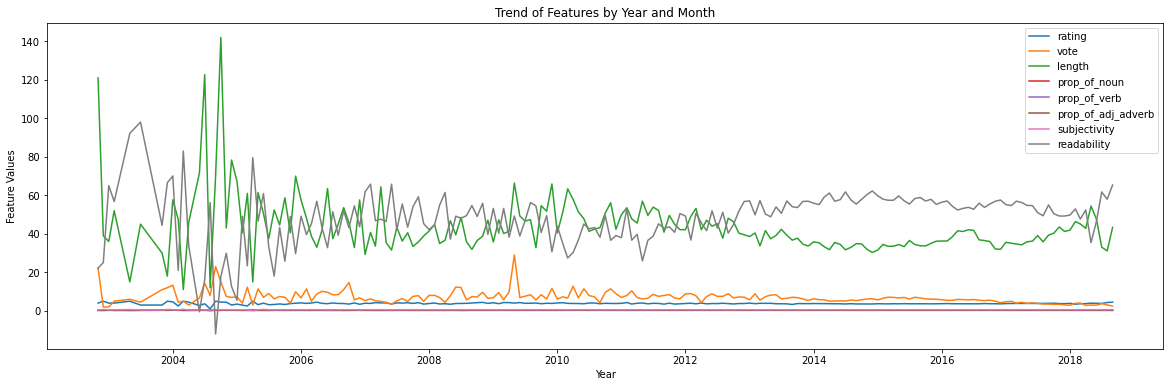

In [510]:
fig = plt.figure(figsize=(20, 6))
year_month = np.asarray(trend_data_by_year_month["year-month"], dtype='datetime64[s]')
plt.plot(year_month, trend_data_by_year_month["rating"], label = "rating")
plt.plot(year_month, trend_data_by_year_month["vote"], label = "vote")
plt.plot(year_month, trend_data_by_year_month["length"], label = "length")
plt.plot(year_month, trend_data_by_year_month["prop_of_noun"], label = "prop_of_noun")
plt.plot(year_month, trend_data_by_year_month["prop_of_verb"], label = "prop_of_verb")
plt.plot(year_month, trend_data_by_year_month["prop_of_adj_adverb"], label = "prop_of_adj_adverb")
plt.plot(year_month, trend_data_by_year_month["subjectivity"], label = "subjectivity")
plt.plot(year_month, trend_data_by_year_month["readability"], label = "readability")
plt.xlabel("Year")
plt.ylabel("Feature Values")
#plt.xticks(rotation = 90)
plt.title("Trend of Features by Year and Month")
plt.legend()

[Text(0, 0.5, 'Feature Values'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Trend of readability by year and month')]

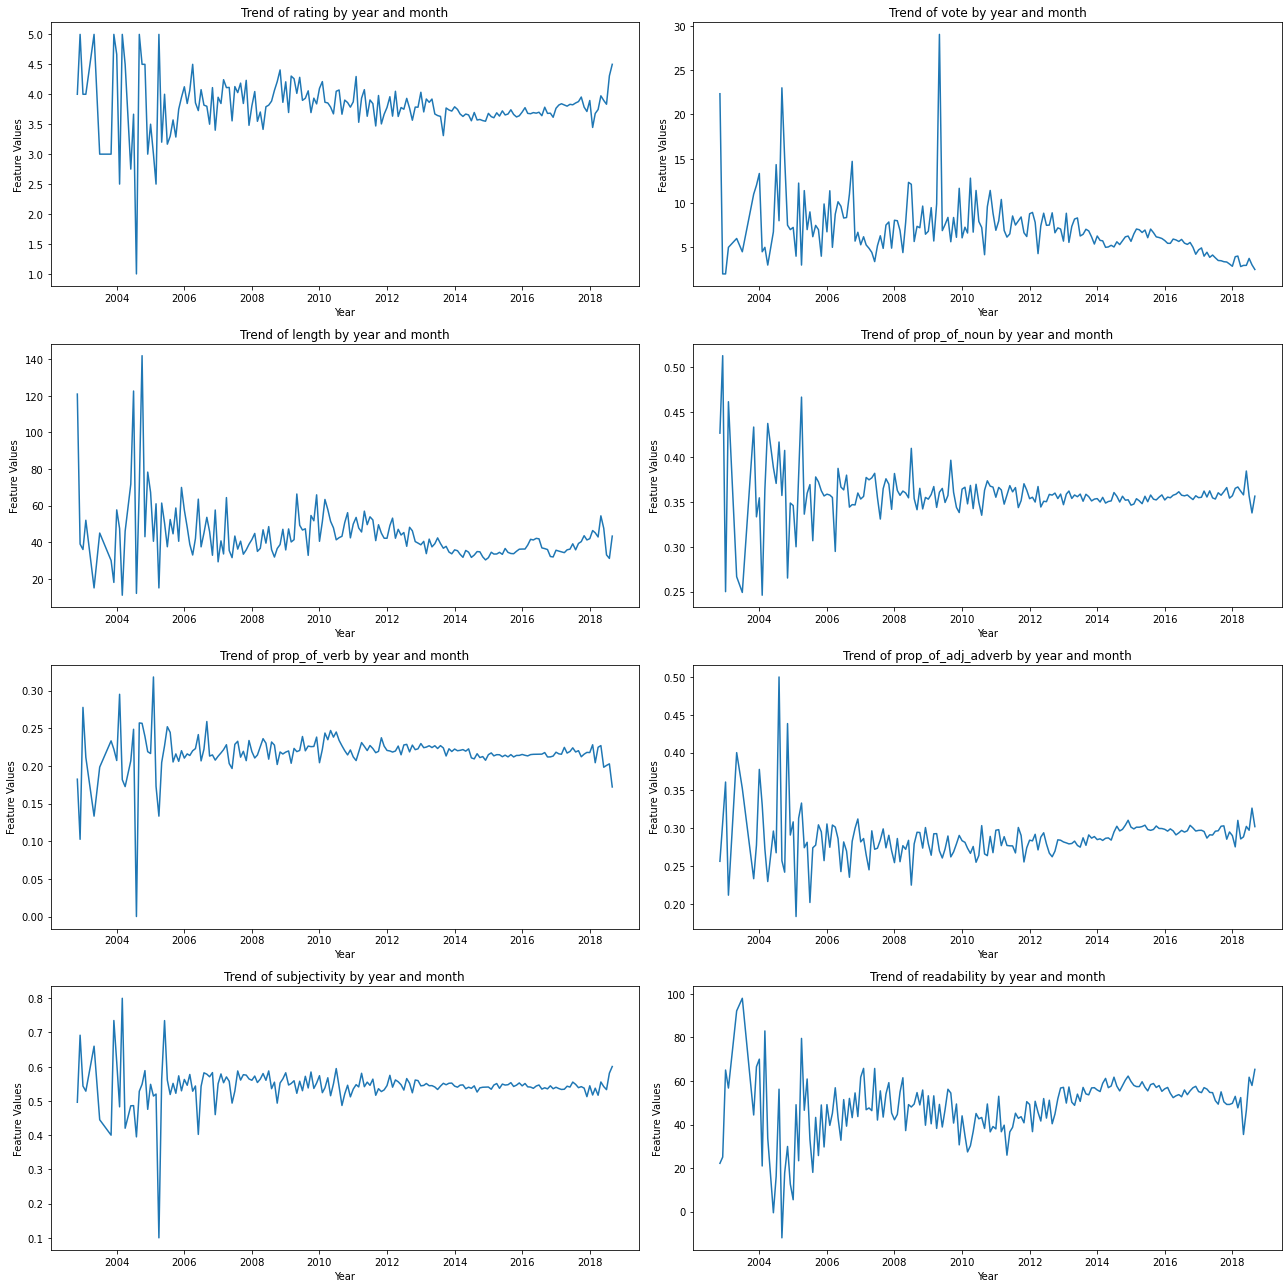

In [511]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(18, 18), tight_layout=True)
axes[0][0].plot(year_month, trend_data_by_year_month["rating"], label = "rating")
axes[0][0].set(title="Trend of rating by year and month", xlabel="Year", ylabel="Feature Values")
axes[0][1].plot(year_month, trend_data_by_year_month["vote"], label = "vote")
axes[0][1].set(title="Trend of vote by year and month", xlabel="Year", ylabel="Feature Values")
axes[1][0].plot(year_month, trend_data_by_year_month["length"], label = "length")
axes[1][0].set(title="Trend of length by year and month", xlabel="Year", ylabel="Feature Values")
axes[1][1].plot(year_month, trend_data_by_year_month["prop_of_noun"], label = "prop_of_noun")
axes[1][1].set(title="Trend of prop_of_noun by year and month", xlabel="Year", ylabel="Feature Values")
axes[2][0].plot(year_month, trend_data_by_year_month["prop_of_verb"], label = "prop_of_verb")
axes[2][0].set(title="Trend of prop_of_verb by year and month", xlabel="Year", ylabel="Feature Values")
axes[2][1].plot(year_month, trend_data_by_year_month["prop_of_adj_adverb"], label = "prop_of_adj_adverb")
axes[2][1].set(title="Trend of prop_of_adj_adverb by year and month", xlabel="Year", ylabel="Feature Values")
axes[3][0].plot(year_month, trend_data_by_year_month["subjectivity"], label = "subjectivity")
axes[3][0].set(title="Trend of subjectivity by year and month", xlabel="Year", ylabel="Feature Values")
axes[3][1].plot(year_month, trend_data_by_year_month["readability"], label = "readability")
axes[3][1].set(title="Trend of readability by year and month", xlabel="Year", ylabel="Feature Values")